In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tarfile
import urllib.request
import os
from pathlib import Path
import re
from helpers.dataset_explore import display_model_image, display_fragment_image, display_fragment_and_model
from helpers.zookeeper import index_zoo_files, parse_zoo_filename


Download full dataset (if not present), set up working directory

In [51]:
# Automatically set working dir to the notebook location
base_dir = os.path.dirname(os.path.abspath("__file__"))  # __file__ is undefined in notebooks
print(base_dir)
os.chdir(base_dir)

# Dataset details
url = "https://github.com/songyang-dev/uml-classes-and-specs/releases/download/v1.0.0/dataset.tar.gz"
tar_path = "dataset.tar.gz"
extract_dir = "dataset"

# Download dataset if not already present
if not os.path.exists(tar_path):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, tar_path)
    print("Download complete.")
else:
    print("Dataset archive already exists. Skipping download.")

# Extract dataset if not already extracted (in 'dataset')
if not os.path.isdir(extract_dir):
    print("Extracting dataset into folder 'dataset/'...")
    os.makedirs(extract_dir, exist_ok=True)
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=extract_dir)  # Extract inside 'dataset'
    print("Extraction complete.")
else:
    print("Dataset already extracted.")

# Count total number of files extracted
file_count = sum(len(files) for _, _, files in os.walk(extract_dir))
print(f"{file_count} files found in '{extract_dir}'.")

zoo_dir = Path(extract_dir) / "zoo"

/Users/piachouaifaty/GitHub/Siemens___Task/uml-classes-and-specs
Dataset archive already exists. Skipping download.
Dataset already extracted.
25878 files found in 'dataset'.


In [52]:
zoo_idx = index_zoo_files()

In [53]:
zoo_idx

,file_name,file_path
0,USECASE1_rel12.png,dataset/zoo/USECASE1_rel12.png
1,ODP-CV_rel17.png,dataset/zoo/ODP-CV_rel17.png
2,sbvrEclipse_class317.ecore,dataset/zoo/sbvrEclipse_class317.ecore
3,sbvrEclipse_rel81.plantuml,dataset/zoo/sbvrEclipse_rel81.plantuml
4,J2SE5_rel3.plantuml,dataset/zoo/J2SE5_rel3.plantuml
...,...,...
25839,sbvrOMG_class190.ecore,dataset/zoo/sbvrOMG_class190.ecore
25840,sbvrEclipse_class255.png,dataset/zoo/sbvrEclipse_class255.png
25841,UEMLExtensionDynamicAspects_rel6.plantuml,dataset/zoo/UEMLExtensionDynamicAspects_rel6.p...
25842,ProMarte_class95.png,dataset/zoo/ProMarte_class95.png


In [54]:
dataset_path = Path(extract_dir)

fragments = pd.read_csv(dataset_path / "fragments.csv")
labels = pd.read_csv(dataset_path / "labels.csv")
models = pd.read_csv(dataset_path / "models.csv")


In [55]:
fragments

,kind,number,unique_id,model
0,class,16,256,Agate
1,class,1,662,DoDAF-OV5
2,class,53,799,SysML
3,class,91,43,SCADE
4,class,4,1497,OpenQVT
...,...,...,...,...
8167,rel,24,8168,ProMarte
8168,rel,132,8169,XHTML
8169,rel,39,8170,DoDAF-SV4
8170,rel,70,8171,MSVisio_DatadiagramMLTextFormat


In [56]:
labels

,id,label,fragment_id,in_english,validated
0,355,Key is a class in SimpleRDBMS package,2209,t,t
1,357,A Key is owned by one and only one Table in an...,5053,t,t
2,358,A Key refers to 0 or several opposite foreign ...,5911,t,t
3,361,A Foreign Key refers to one and only one Key i...,7988,t,t
4,27,The metamodel is composed of a Publication cla...,1135,t,t
...,...,...,...,...,...
644,707,There is a class ReuseContract with a relation...,7287,t,t
645,709,A class named Dependency.\r\nThe class has no ...,3430,t,t
646,710,A class Dependency.\r\nThere is a relation fro...,4586,t,t
647,711,There are two classes: CompositeProvider and R...,4790,t,t


In [57]:
models

,name,classes,relations
0,ACG,70,29
1,ACME,16,8
2,ADELFE,19,14
3,ASM,0,0
4,ATL,28,33
...,...,...,...
275,sbvrEclipse,332,185
276,sbvrOMG,193,46
277,useCase,8,5
278,vb,0,0


In [58]:
print(f"Number of model entries: {models.shape[0]}")
print(f"Number of fragment entries : {fragments.shape[0]}")
print(f"Number of label entries: {labels.shape[0]}")


Number of model entries: 280
Number of fragment entries : 8172
Number of label entries: 649


In [59]:
# Class and relation counts from fragments
kind_counts = fragments['kind'].value_counts()
print("\nFragment kinds:")
print(kind_counts)


Fragment kinds:
kind
class    4525
rel      3647
Name: count, dtype: int64


In [60]:
# Join labels to fragments to see what label describes what kind
labeled_fragments = labels.merge(fragments, left_on="fragment_id", right_on="unique_id", how="inner")
labeled_fragments

,id,label,fragment_id,in_english,validated,kind,number,unique_id,model
0,355,Key is a class in SimpleRDBMS package,2209,t,t,class,4,2209,QVT_SimpleRDBMS
1,357,A Key is owned by one and only one Table in an...,5053,t,t,rel,5,5053,QVT_SimpleRDBMS
2,358,A Key refers to 0 or several opposite foreign ...,5911,t,t,rel,6,5911,QVT_SimpleRDBMS
3,361,A Foreign Key refers to one and only one Key i...,7988,t,t,rel,8,7988,QVT_SimpleRDBMS
4,27,The metamodel is composed of a Publication cla...,1135,t,t,class,0,1135,Publication
...,...,...,...,...,...,...,...,...,...
644,707,There is a class ReuseContract with a relation...,7287,t,t,rel,0,7287,UML_withReuseContracts
645,709,A class named Dependency.\r\nThe class has no ...,3430,t,t,class,1,3430,UML_withReuseContracts
646,710,A class Dependency.\r\nThere is a relation fro...,4586,t,t,rel,1,4586,UML_withReuseContracts
647,711,There are two classes: CompositeProvider and R...,4790,t,t,rel,2,4790,UML_withReuseContracts


In [61]:
def match_models_to_zoo_files(models_df, zoo_files_df):
    """
    Match zoo files to known model names (prefix match).
    Returns:
        matched_df: files matched to a model
        unmatched_files_df: zoo files not matched to any model
        unmatched_models_df: models not matched to any file
    """
    matched_rows = []
    matched_file_names = set()
    matched_models = set()

    model_names = models_df['name'].unique()

    for model_name in model_names:
        matches = zoo_files_df[zoo_files_df['file_name'].str.startswith(model_name)]
        if not matches.empty:
            matched_models.add(model_name)
        for _, row in matches.iterrows():
            matched_rows.append({
                "model": model_name,
                "file_name": row["file_name"],
                "file_path": row["file_path"]
            })
            matched_file_names.add(row["file_name"])

    matched_df = pd.DataFrame(matched_rows)

    # Files not matched to any model
    unmatched_files_df = zoo_files_df[~zoo_files_df['file_name'].isin(matched_file_names)].copy()

    # Models that didn't match any file
    unmatched_models_df = models_df[~models_df['name'].isin(matched_models)].copy()

    return matched_df, unmatched_files_df, unmatched_models_df


In [62]:
matched_df, unmatched_files_df, unmatched_models_df = match_models_to_zoo_files(models, zoo_idx)


In [63]:
matched_df

,model,file_name,file_path
0,ACG,ACG_class19.ecore,dataset/zoo/ACG_class19.ecore
1,ACG,ACG_class22.png,dataset/zoo/ACG_class22.png
2,ACG,ACG_class36.png,dataset/zoo/ACG_class36.png
3,ACG,ACG_rel16.plantuml,dataset/zoo/ACG_rel16.plantuml
4,ACG,ACG_rel17.plantuml,dataset/zoo/ACG_rel17.plantuml
...,...,...,...
34014,yUML,yUML_class6.ecore,dataset/zoo/yUML_class6.ecore
34015,yUML,yUML_class2.ecore,dataset/zoo/yUML_class2.ecore
34016,yUML,yUML_class4.plantuml,dataset/zoo/yUML_class4.plantuml
34017,yUML,yUML_class5.plantuml,dataset/zoo/yUML_class5.plantuml


In [64]:
unmatched_files_df

,file_name,file_path
528,ontofarm.html,dataset/zoo/ontofarm.html
531,mlhim2.ecore,dataset/zoo/mlhim2.ecore
722,edas.owl.ecore,dataset/zoo/edas.owl.ecore
758,OpenConf.owl_*.plantuml,dataset/zoo/OpenConf.owl_*.plantuml
853,confious.owl_*.plantuml,dataset/zoo/confious.owl_*.plantuml
...,...,...
24672,BPEL.ecore,dataset/zoo/BPEL.ecore
24788,cmt.owl_*.plantuml,dataset/zoo/cmt.owl_*.plantuml
25203,confOf.owl.plantuml,dataset/zoo/confOf.owl.plantuml
25475,Requirement.yuml,dataset/zoo/Requirement.yuml


In [41]:
#unmatched_models_df
#None

,name,classes,relations


In [65]:
parsed_cols = matched_df["file_name"].apply(lambda fn: pd.Series(parse_zoo_filename(fn), index=["kind", "number", "file_type"]))
matched_df = pd.concat([matched_df, parsed_cols], axis=1)
matched_df

,model,file_name,file_path,kind,number,file_type
0,ACG,ACG_class19.ecore,dataset/zoo/ACG_class19.ecore,class,19.0,ecore
1,ACG,ACG_class22.png,dataset/zoo/ACG_class22.png,class,22.0,png
2,ACG,ACG_class36.png,dataset/zoo/ACG_class36.png,class,36.0,png
3,ACG,ACG_rel16.plantuml,dataset/zoo/ACG_rel16.plantuml,rel,16.0,plantuml
4,ACG,ACG_rel17.plantuml,dataset/zoo/ACG_rel17.plantuml,rel,17.0,plantuml
...,...,...,...,...,...,...
34014,yUML,yUML_class6.ecore,dataset/zoo/yUML_class6.ecore,class,6.0,ecore
34015,yUML,yUML_class2.ecore,dataset/zoo/yUML_class2.ecore,class,2.0,ecore
34016,yUML,yUML_class4.plantuml,dataset/zoo/yUML_class4.plantuml,class,4.0,plantuml
34017,yUML,yUML_class5.plantuml,dataset/zoo/yUML_class5.plantuml,class,5.0,plantuml


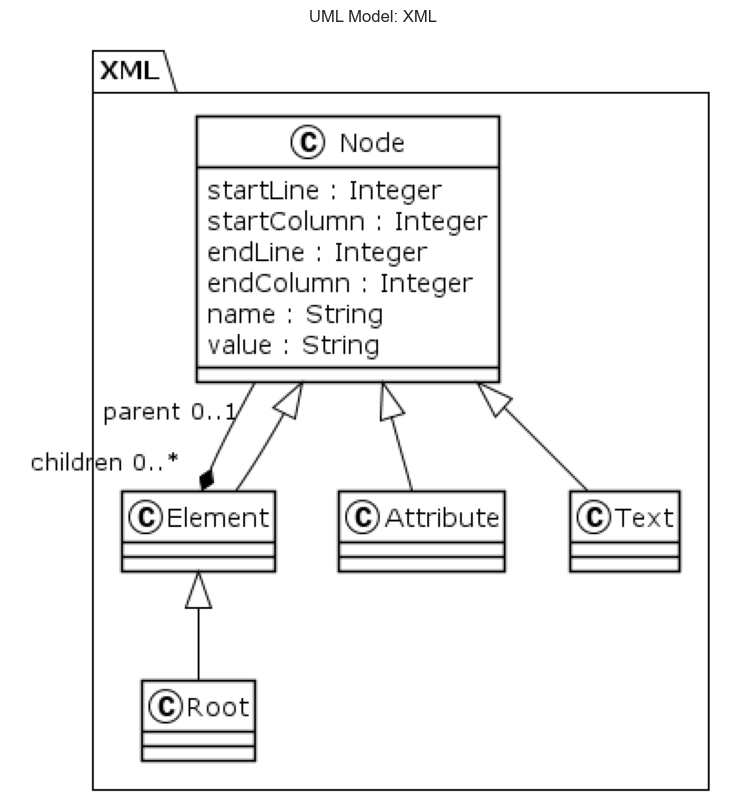

In [22]:
display_model_image("XML")

In [23]:
#fragment_id = 7349
#display_fragment_and_model(fragment_id=7349, fragments_df=fragments)

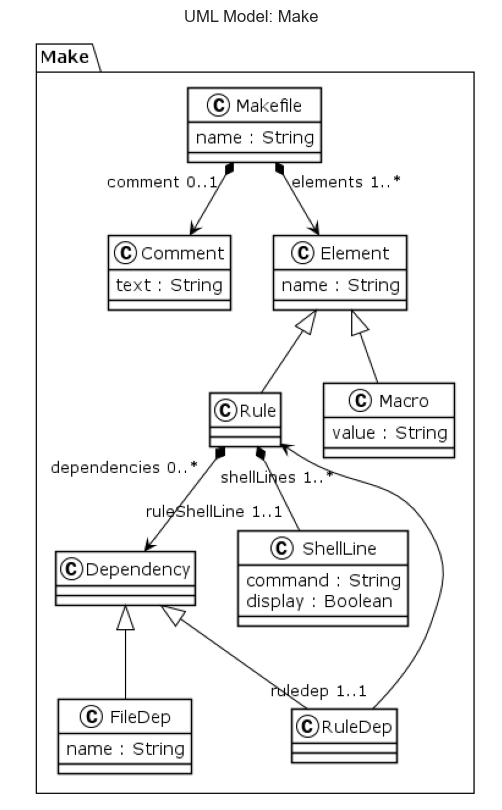

In [24]:
display_model_image("Make")

Fragment number: 2
Fragment kind: rel
Fragment ID: 4941
Fragment image path: dataset/zoo/Make_rel2.png


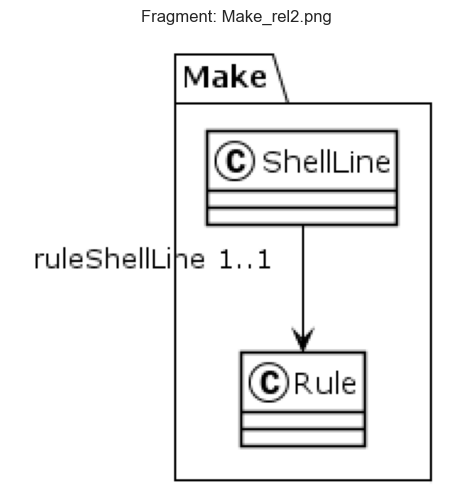

Fragment number: 0
Fragment kind: rel
Fragment ID: 5340
Fragment image path: dataset/zoo/Make_rel0.png


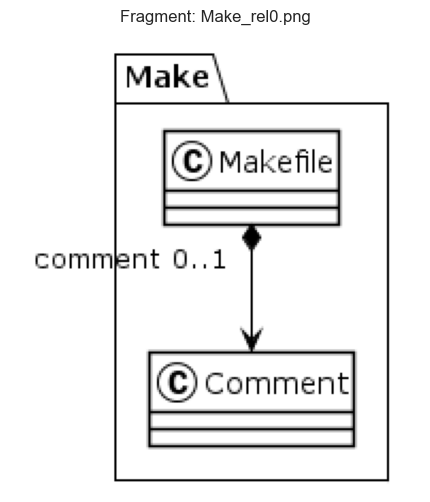

Fragment number: 1
Fragment kind: rel
Fragment ID: 6612
Fragment image path: dataset/zoo/Make_rel1.png


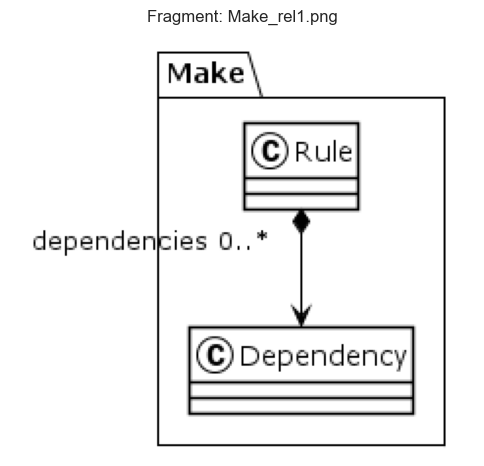

Fragment number: 3
Fragment kind: rel
Fragment ID: 8019
Fragment image path: dataset/zoo/Make_rel3.png


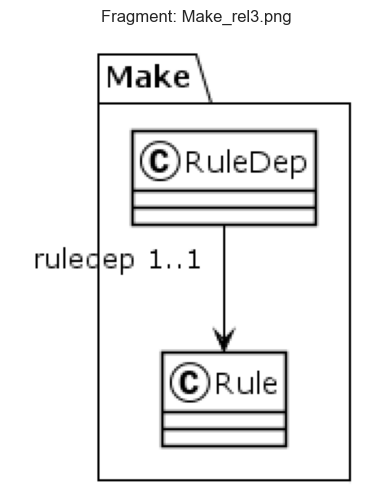

In [25]:
xml_fragments = fragments[
    (fragments['model'] == "Make")
    & (fragments['kind'] == "rel")
]

# Loop through and display
for _, row in xml_fragments.iterrows():
    frag_id = row['unique_id']
    #label = row['label']
    number = row['number']
    kind = row['kind']

    #print(f"Label: {label}")
    print(f"Fragment number: {number}")
    print(f"Fragment kind: {kind}")
    print(f"Fragment ID: {frag_id}")
    display_fragment_image(frag_id, fragments)
    